In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
from helperFun import *

In [14]:
plt.style.use('default')
plt.rc('text',usetex=True)
plt.rc('lines', linewidth=1)

In [15]:
xb = 9./13
xc = 6./13

In [16]:
epsMin1 = 1e-10
epsMax1 = .01
epsVal1 = np.linspace(epsMin1, epsMax1)
entValS1 = []
entValS2 = []

In [17]:
for ep in epsVal1:
    entValS1 += [entropy(probVec1(ep, xb))]
    entValS2 += [entropy(probVec2(ep, xc))]

In [18]:
entValS1 = np.array(entValS1)
entValS2 = np.array(entValS2)

In [19]:
epsMin2 = 1e-12
epsMax2 = 1e-8
epsVals2 = np.linspace(epsMin2, epsMax2, num=200)

In [20]:
entDVal1 = -1*xb*np.log2(epsVals2)
entDVal2 = -1*xc*np.log2(epsVals2)

In [21]:
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)


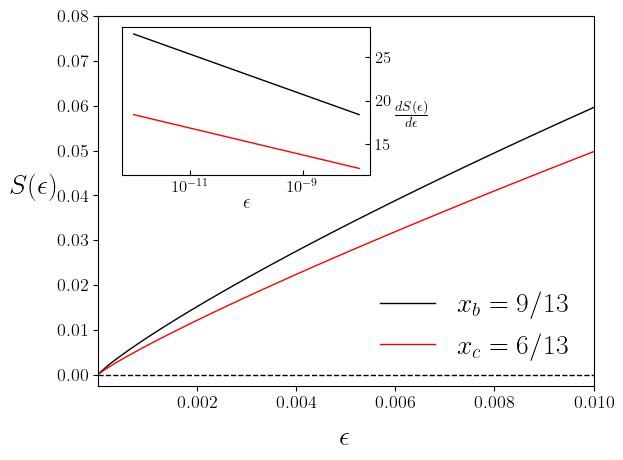

In [22]:
fntSz = 20
fntSz1 = 13
fig, ax1 = plt.subplots()

ax1.set_xlim(epsMin1,epsMax1)
ax1.set_ylim(-0.0025,0.08)

ax1.plot(epsVal1, entValS1,c='k',label=r'$x_b = 9/13$')
ax1.plot(epsVal1, entValS2,c='r',label=r'$x_c = 6/13$')
ax1.plot(epsVal1, 0*epsVal1,c='k',linestyle='--')

ax1.set_ylabel(r'$S(\epsilon)$',labelpad=16,size=fntSz,rotation='horizontal')
ax1.set_xlabel(r'$\epsilon$',labelpad=10,size=fntSz)

ax1.legend(loc=4,framealpha=0,fontsize=fntSz)

ax1.tick_params(direction='out',top=0,right=0,labelsize=fntSz1)
ax1.tick_params(axis='y',labelright=0,labelleft=1,labelsize=fntSz1)


ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
#Left edge, bottom edge, width , height
ip = InsetPosition(ax1, [0.05,0.57,0.5,.4])

ax2.set_axes_locator(ip)
ax2.set_xscale("log")

ax2.plot(epsVals2, entDVal1,c='k',label=r'$x_b = 9/13$')
ax2.plot(epsVals2, entDVal2,c='r',label=r'$x_c = 6/13$')

ax2.yaxis.set_label_position("right")
ax2.set_ylabel(r'$\frac{dS(\epsilon)}{d \epsilon}$',labelpad=14,size=14,rotation='horizontal')
ax2.set_xlabel(r'$\epsilon$',labelpad=0,size=14)


ax2.tick_params(direction='in',top=0,right=1,left=0,labelsize=12)
ax2.tick_params(axis='y',labelright=1,labelleft=0,labelsize=12)

plt.savefig('Fig3LS.pdf',dpi=400,bbox_inches='tight',transparent=True)